In [1]:
import os
import calendar
import numpy as np
import networkx as nx
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pylab as plt

#### Viewing some sample records of the dataset

In [53]:
housing_df = pd.read_csv('BostonHousing.csv')

# rename CAT. MEDV column for easier data handling
housing_df = housing_df.rename(columns={'CAT. MEDV': 'CAT_MEDV'})
housing_df.head(9)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7,0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9,0
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1,0
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5,0


#### Creating some sample visualization

In [7]:
# Load the Amtrak data dn convert them to be suitable for TSA
amtrak_df = pd.read_csv('Amtrak.csv', squeeze=True)
amtrak_df['Date'] = pd.to_datetime(amtrak_df.Month, format='%d/%m/%Y')
ridership_ts = pd.Series(amtrak_df.Ridership.values, index=amtrak_df.Date)

# Boston housing data
housing_df = pd.read_csv('BostonHousing.csv')
hosuing_df = housing_df.rename(columns={'CAT. MEDV': 'CAT_MEDV'})

#### Graphing with Pandas (what)  Matplot does this about 100000x times better

Text(0, 0.5, 'Category of Median Value')

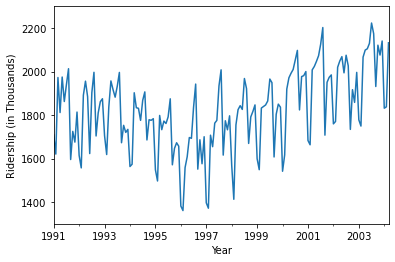

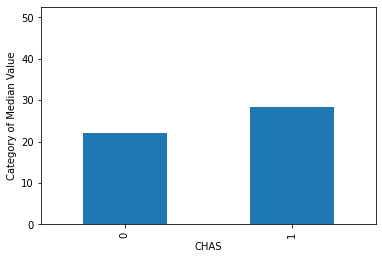

In [18]:
## Line graph
ridership_ts.plot(ylim=[1300, 2300], legend=False)
plt.xlabel('Year')
plt.ylabel('Ridership (in Thousands)')

## scatter plot with axes names
housing_df.plot.scatter(x='LSTAT', y='MEDV', legend=False)

## barchat of Chas vs. mean MEDV
# compute mean MEDV per CHAS = (0, 1)
ax = housing_df.groupby('CHAS').mean().MEDV.plot(kind='bar')
ax.set_ylabel('Category of Median Value')

#### Matplotlib Version

Text(0, 0.5, 'Ridership (in thousands)')

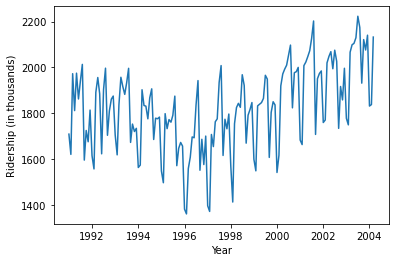

In [28]:
## Line Graph
plt.plot(ridership_ts.index, ridership_ts)
plt.xlabel('Year')
plt.ylabel('Ridership (in thousands)')

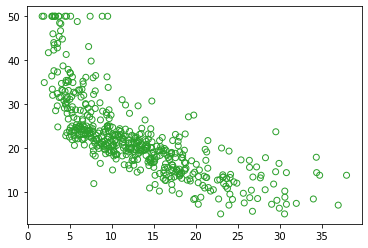

In [30]:
## Set the color of the points in the scatterplot and draw as open circles
plt.scatter(housing_df.LSTAT, housing_df.MEDV, color='C2', facecolor='none')

Text(0, 0.5, '% of CAT.MEDV')

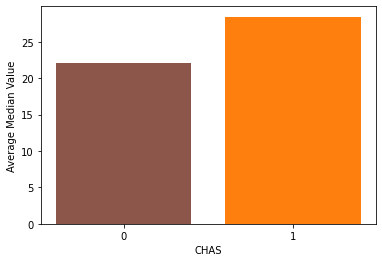

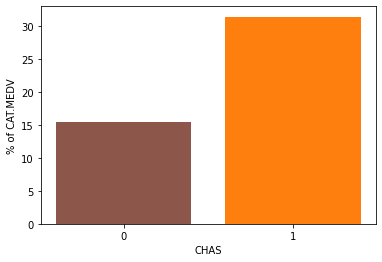

In [55]:
## barchart of CHAS vs. mean MEDV
# Computer means MEDV per CHAS = (0, 1)
medv_by_grouped_chas = housing_df.groupby('CHAS').mean().MEDV
figure, axes = plt.subplots()
axes.bar(medv_by_grouped_chas.index, medv_by_grouped_chas, color=['C5', 'C1'])
axes.set_xticks([0, 1])
axes.set_xlabel('CHAS')
axes.set_ylabel('Average Median Value')

## barchart of CHAS vs. CAT.MEDV
cat_medv_by_grouped_chas = housing_df.groupby('CHAS').mean()['CAT_MEDV'] * 100
figure, axes = plt.subplots()
axes.bar(cat_medv_by_grouped_chas.index, cat_medv_by_grouped_chas, color=['C5', 'C1'])
axes.set_xticks([0, 1])
axes.set_xlabel('CHAS')
axes.set_ylabel('% of CAT.MEDV')

### Distribution Plots

Text(0, 0.5, 'count')

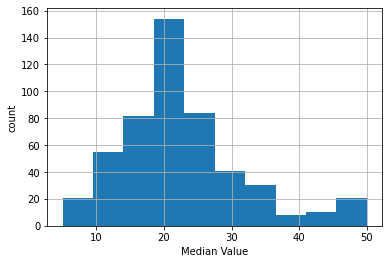

In [57]:
## Histogram of Median Value (MEDV)
axes = housing_df.MEDV.hist()
axes.set_xlabel('Median Value')
axes.set_ylabel('count')

Text(0, 0.5, 'Count')

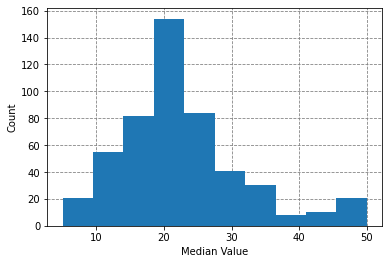

In [68]:
## With matplotlib
figure, ax = plt.subplots()
ax.hist(housing_df.MEDV)
ax.set_axisbelow(True)
ax.grid(which='major', color='grey', linestyle='--')
ax.set_xlabel('Median Value')
ax.set_ylabel('Count')

Text(0, 0.5, 'Median Value')

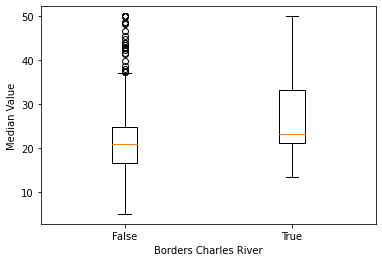

In [77]:
## Boxplot of Median value for different values of CHAS (borders Charles river)
median_value_by_chas = [
    list(housing_df[housing_df.CHAS == 0].MEDV),
    list(housing_df[housing_df.CHAS == 1].MEDV)
]

fig, ax = plt.subplots()
ax.boxplot(median_value_by_chas)
ax.set_xlabel('Borders Charles River')
ax.set_xticks([1, 2])
ax.set_xticklabels(['False', 'True'])
ax.set_ylabel('Median Value')